This code is for discrete dice rolling experiment

Importing the libraries

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [21]:
import matplotlib.pyplot as plt

DEFINING THE GENERATOR AND DISCRIMINATOR ARCHITECHTURE

In [22]:
# Define the Generator network
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(10,), activation='tanh'))
    model.add(layers.Dense(512, activation='tanh'))
    # model.add(layers.Dense(1024, activation='relu'))
    # model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='tanh'))
    model.add(layers.Dense(256, activation='tanh'))
    model.add(layers.Dense(200, activation='linear'))
    return model

In [23]:
# Define the Discriminator network
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(200,), activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

DEFINING THE GENERATOR AND DISCRIMINATOR LOSSES

In [25]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# For generator loss extra integer penalty has been added

def generator_loss(fake_output, generated_sequences):
    standard_gan_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
    target_values = [1, 2, 3, 4, 5, 6]  # Set of target values
    distance_to_target = tf.reduce_min(tf.abs(tf.expand_dims(generated_sequences, -1) - target_values), axis=-1)
    mean_distance = tf.reduce_mean(distance_to_target)
    penalty_weight = 1
    total_loss = standard_gan_loss + penalty_weight * mean_distance
    return total_loss


DEFINING THE OPTIMIZERS

In [26]:
generator_optimizer = tf.keras.optimizers.legacy.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.legacy.Adam(1e-4)

TRAINING STEP

In [27]:
# Define the training function
@tf.function
def train_step(real_sequences):

    #Generate latent noise
    noise = tf.random.normal([real_sequences.shape[0], 10])


    # Calculate the losses
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_sequences = generator(noise, training=True)

        real_output = discriminator(real_sequences, training=True)
        fake_output = discriminator(generated_sequences, training=True)

        gen_loss = generator_loss(fake_output, generated_sequences)
        disc_loss = discriminator_loss(real_output, fake_output)

    # Calculate the gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Update the generator and discriminator
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [28]:
# Define the number of training epochs and batch size
num_epochs = 1000
batch_size = 100

HERE I AM GENERATING TRAINING DATA

In [29]:
array = np.random.rand(2000000)
array = array*6
vals = np.zeros(6)

for p in range(2000000):
    
    for q in range(6):
        if(array[p] <= (q+1)):
            array[p] = q+1
            vals[q] = vals[q] + 1
            break

vals = vals/200000

In [30]:
print(vals)

[1.67064  1.66781  1.665725 1.665535 1.66355  1.66674 ]


(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0., 334128.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 333562.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 333145.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 333107.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0., 332710.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
        333348.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00

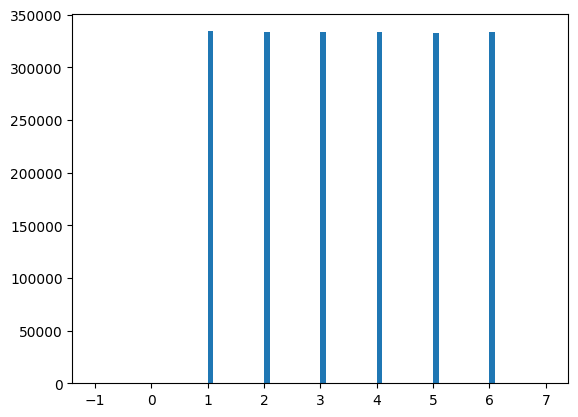

In [31]:
bin_size = 0.1
bins = np.arange(-1, 7 + bin_size, bin_size)
plt.hist(array, bins=bins)

In [32]:
training_data = array.reshape(10000, 200)
train_dataset = tf.data.Dataset.from_tensor_slices(training_data).shuffle(len(training_data)).batch(batch_size)


INITIALIZING THE GENERATOR AND DISCRIMINATOR MODEL

In [33]:
# Instantiate the Generator and Discriminator models
generator = make_generator_model()
discriminator = make_discriminator_model()

In [34]:
store = np.zeros((20, 200000))

HERE THE TRAINING OCCURS

In [35]:

# Training loop
for epoch in range(num_epochs):
    for sequences in train_dataset:
        train_step(sequences)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} completed.")
        
    if (epoch + 1) % 100 == 0:
        
        val = (epoch+1)/100 - 1
        for q in range(1000):
            noise = tf.random.normal([1, 10])
            xx = generator(noise, training=False).numpy().squeeze()
    
            for p in range(200):
                store[int(val)][int(q*200 + p)] = xx[p]




Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 10/1000 completed.
Epoch 20/1000 completed.
Epoch 30/1000 completed.
Epoch 40/1000 completed.
Epoch 50/1000 completed.
Epoch 60/1000 completed.
Epoch 70/1000 completed.
Epoch 80/1000 completed.
Epoch 90/1000 completed.
Epoch 100/1000 completed.
Epoch 110/1000 completed.
Epoch 120/1000 completed.
Epoch 130/1000 completed.
Epoch 140/1000 completed.
Epoch 150/1000 completed.
Epoch 160/1000 completed.
Epoch 170/1000 completed.
Epoch 180/1000 completed.
Epoch 190/1000 completed.
Epoch 200/1000 completed.
Epoch 210/1000 completed.
Epoch 220/1000 completed.
Epoch 230/1000 completed.
Epoch 240/1000 completed.
Epoch 250/1000 completed.
Epoch 260/1000 completed.
Epoch 270/1000 completed.
Epoch 280/1000 completed.
Epoch 290/1000 completed.
Epoch 300/1000 completed.
Epoch 310/1000 completed.
Epoch 320/1000 completed.
Epoch 330/1000 completed.
Epoch 340/1000 completed.
Epoch 350/1000 completed.
Epoch 360/1000 completed.
Epoch 370/1000 completed.
Epoch 380/1000 completed.
Epoch 390/1000 comple

GENERATED OUTPUT AFTER 100, 200, 300, ..... 1000 EPOCHS

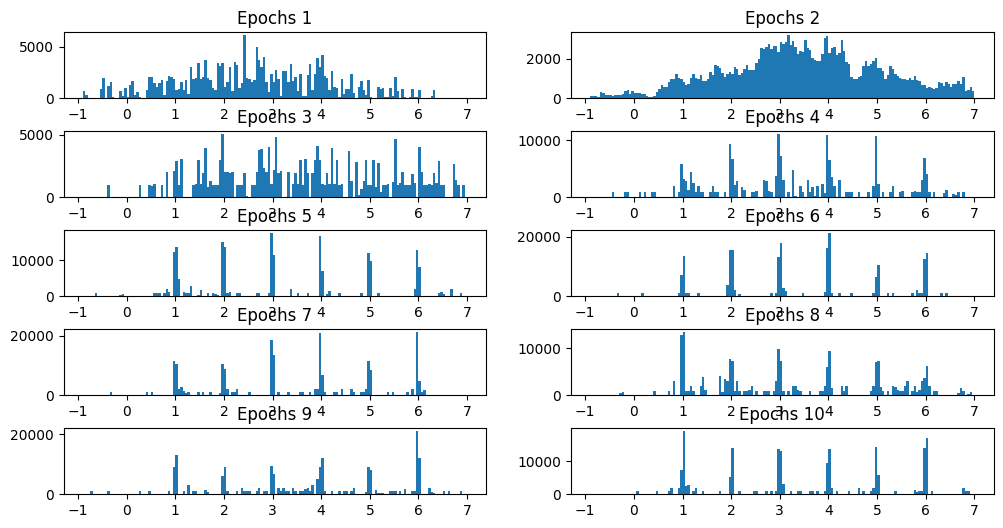

In [36]:
fig, axs = plt.subplots(5, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)  


for i, ax in enumerate(axs.flat):
    bin_size = 0.05
    bins = np.arange(-0.9, 7 + bin_size, bin_size)
    
    # Plot the histogram in the current subplot
    ax.hist(store[i], bins=bins)
    

    ax.set_title(f'Epochs {i+1}')
    
    # You can customize the appearance of each subplot using ax.set_...

# Show the plots
plt.show()

In [37]:
print(store[17])

[0. 0. 0. ... 0. 0. 0.]


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+03,
        1.0000e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1368e+04,
        1.2620e+04, 4.1150e+03, 1.8970e+03, 0.0000e+00, 1.0000e+03,
        9.9900e+02, 1.0000e+00, 1.0000e+03, 0.0000e+00, 1.1110e+04,
        1.0854e+04, 1.0360e+03, 3.0000e+03, 0.0000e+00, 0.0000e+00,
        1.0000e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8470e+04,
        1.3530e+04, 1.0000e+03, 0.0000e+00, 1.0000e+03, 0.0000e+00,
        1.0000e+03, 1.0000e+03, 1.0000e+03, 2.0030e+03, 2.3018e+04,
        7.9790e+03, 0.0000e+00, 9.4000e+02, 1.0600e+03, 2.0000e+03,
        0.0000e+00, 3.0000e+03, 0.0000e+00, 2.0000e+03, 1.3470e+04,
        8.5300e+03, 0.0000e+00, 0.0000e+00, 1.0000e+03, 1.0000e+03,
        0.0000e+00, 0.0000e+00, 1.0000e+03, 1.9940e+03, 2.1259e+04,
        5.7470e+03, 2.0000e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7

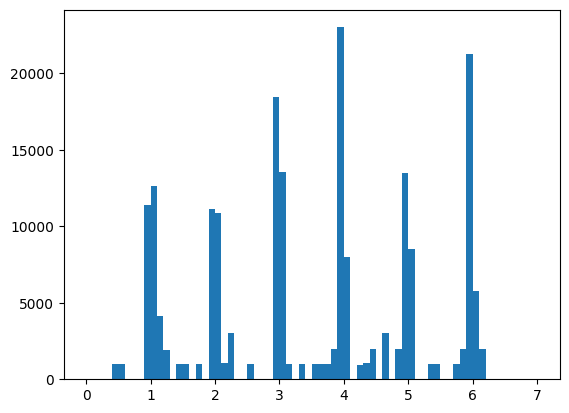

In [38]:
bin_size = 0.1
bins = np.arange(0, 7 + bin_size, bin_size)
plt.hist(store[6], bins=bins)